In [17]:
pip install yfinance 

Note: you may need to restart the kernel to use updated packages.


In [18]:
import yfinance as yf

In [19]:
import pandas as pd
import os

In [20]:
#define ticket symbol and period for which we want to fetch the stock prices
ticker = "TSL"
start_date = "2020-01-01"
end_date = "2024-08-15"

#Fetch the stock prices for the specified period
data = yf.download(ticker, start=start_date, end=end_date)

#print the fetched stock prices
print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.876114   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.167587   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.742653   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.400536   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.565201   
...                ...         ...         ...         ...         ...   
2024-08-08  213.110001  214.199997  208.830002  213.309998  213.063385   
2024-08-09  212.100006  216.779999  211.970001  216.240005  215.990005   
2024-08-12  216.070007  219.509995  215.600006  217.529999  217.529999   
2024-08-13  219.009995  221.889999  219.009995  221.270004  221.270004   
2024-08-14  220.570007  223.029999  219.699997  221.720001  221.720001   

               Volume  
Date         

In [21]:
df = pd.DataFrame(data)

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167587,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1162 entries, 2020-01-02 to 2024-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1162 non-null   float64
 1   High       1162 non-null   float64
 2   Low        1162 non-null   float64
 3   Close      1162 non-null   float64
 4   Adj Close  1162 non-null   float64
 5   Volume     1162 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.5 KB


In [24]:
df['date']=pd.to_datetime(df.index)

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400,2020-01-02
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167587,146322800,2020-01-03
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200,2020-01-06
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000,2020-01-07
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200,2020-01-08


In [26]:
import plotly.graph_objects as go

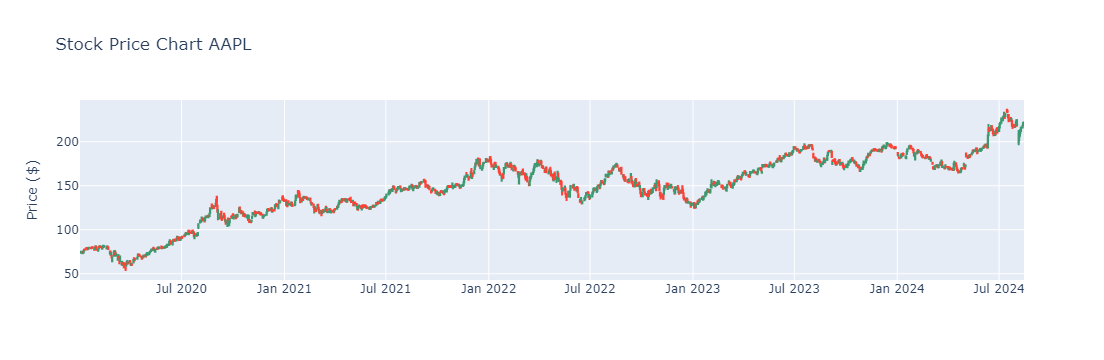

In [28]:
#create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

#Customize the chart layout
fig.update_layout(
    title='Stock Price Chart AAPL',
    yaxis_title='Price ($)',
    xaxis_rangeslider_visible=False)

#Display the chart
fig.show()

In [32]:
df.drop(['date', 'Volume'], axis=1, inplace=True)

In [40]:
df.reset_index(drop=True, inplace=True)

<Axes: >

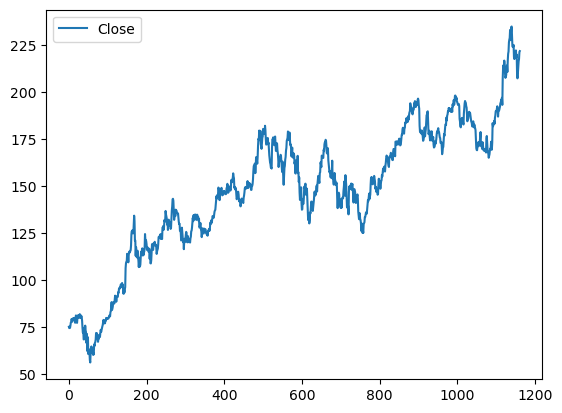

In [41]:
df.plot.line(y="Close", use_index=True)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# load the dataset
# df=pd.read_cse('stock_prices.csv')

#split the dataset into training and testing sets
X = df[['Open', 'Close', 'High', 'Low', 'Adj Close']]  #input features
y = df['Close'] #Target Value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
rf.fit(X_train, y_train)

#Make prediction on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared eroor:', mse)

Mean squared eroor: 0.10726440317781992


In [47]:
import numpy as np

# input values to predict the stock price
new_data = np.array([[173, 174, 172, 173, 173]])

#make predictions using the trained model
predicted_price = rf.predict(new_data)

# print the predicted stock price
print('Predicted Stock Price:', predicted_price[0])

Predicted Stock Price: 173.960498046875


C:\Users\sharm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [48]:
df.tail()

,Open,High,Low,Close,Adj Close
1157,213.110001,214.199997,208.830002,213.309998,213.063385
1158,212.100006,216.779999,211.970001,216.240005,215.990005
1159,216.070007,219.509995,215.600006,217.529999,217.529999
1160,219.009995,221.889999,219.009995,221.270004,221.270004
1161,220.570007,223.029999,219.699997,221.720001,221.720001
